In [ ]:
#https://dzone.com/articles/malware-detection-with-convolutional-neural-networ
#https://github.com/AFAgarap/malware-classification/blob/master/main.py

In [73]:
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [74]:
def load_data(dataset, standardize=True):


    features = dataset['arr'][:, 0]
    features = np.array([feature for feature in features])
    features = np.reshape(features, (features.shape[0], features.shape[1] * features.shape[2]))

    if standardize:
       features = StandardScaler().fit_transform(features)

    labels = dataset['arr'][:, 1]
    labels = np.array([label for label in labels])

    return features, labels

In [75]:
from sklearn.model_selection import train_test_split

#print(os.getcwd())
malwareds = np.load('AppData\Roaming\MalwareDS\malimg.npz', 'r')
#type(malwareds)
#df = pd.DataFrame(malwareds)
#print(df)
#print(malwareds.keys())
#len(malwareds)
#for k, m in enumerate(malwareds):
#    print(' record {}---> {}' .format(k, malwareds[m]))
features, labels = load_data(dataset=malwareds)
#print(len(features),len(labels))
#print(features.shape,labels.shape)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.30,stratify=labels)
print(train_features[0], train_labels[0])

C:\Users\750011694\AppData\Local\Continuum\anaconda3\envs\ml-learning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\750011694\AppData\Local\Continuum\anaconda3\envs\ml-learning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[-0.64927367 -0.71776896 -0.75843253 ...  1.56046223 -0.41050481
  1.02996107] 2


import os
import scipy
import array
import sys

filename = 'AppData\Roaming\MalwareDS\malimg.npz';
f = open(filename,'rb');
ln = os.path.getsize(filename);
#print(ln)
width = 256;
rem = ln%width;
print(rem)

a = array.array("B");

a.fromfile(f,ln-rem);
f.close();

#print(len(a))
#print(a)

a=train_features[0]
print(type(a))
g = a.reshape(a,(len(a)/width,width)).astype('float32')
#g = np.reshape(a,(len(a)/width,width));
g = np.uint8(g);

#scipy.misc.imsave('mal1.png',g);

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = (1, 28, 28), ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, ))
model.add(Dense(num_classes, ))
model.compile(, , metrics = ['accuracy'])

#For feature selection using GIST; pyleargist
Import leargist
image = Image.open('<Image_Name_Here>.png');
New_im = image.resize((64,64));
des = leargist.color_gist(New_im);
Feature_Vector = des[0:320];

In [79]:
train_features_plot = train_features.reshape(-1, 32,32)
#test_features = test_features.reshape(-1, 32,32)
train_features_plot = np.uint8(train_features_plot);

train_features = train_features.reshape(-1, 32,32, 1)
test_features = test_features.reshape(-1, 32,32, 1)
#print(train_features[0], train_labels[0])

batch_size = 64
epochs = 20
num_classes = 25

class_names = ['Allaple.L','Allaple.A','Yuner.A','Lolyda.AA 1','Lolyda.AA 2','Lolyda.AA 3','C2Lop.P','C2Lop.gen!G','Instant access','Swizzor.gen!I',
'Swizzor.gen!E','VB.AT','Fakerean','Alueron.gen!J','Malex.gen!J','Lolyda.AT','Adialer.C','Wintrim.BX','Dialplatform.B','Dontovo.A',
'Obfuscator.AD','Agent.FYI','Autorun.K','Rbot!gen','Skintrim.N']

print(len(class_names))

print(train_features_plot.shape)
print(train_features.shape)

25
(6537, 32, 32)
(6537, 32, 32, 1)


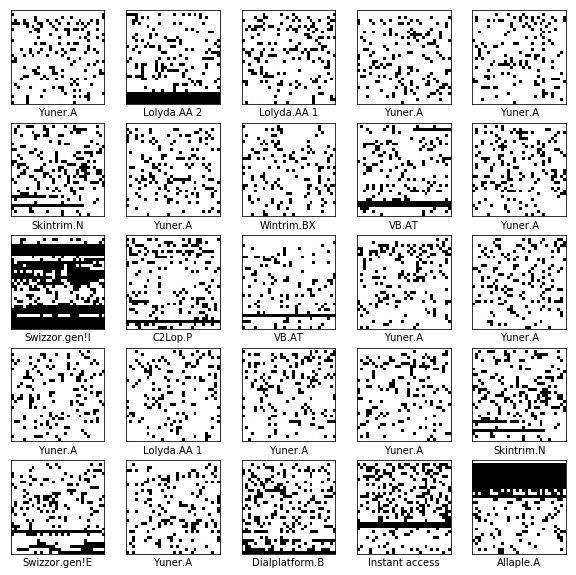

In [83]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_features_plot[i], cmap=plt.cm.binary)
    #print(i, train_labels[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [99]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),input_shape=(32,32,1),activation=LeakyReLU(.1)))
#model.add(LeakyReLU(.1))
model.add(MaxPooling2D(pool_size=(2, 2),))
model.add(Conv2D(64, (3, 3), activation=LeakyReLU(.1)))
#model.add(LeakyReLU(.1))
model.add(MaxPooling2D(pool_size=(2, 2),))
model.add(Conv2D(64, (3, 3), activation=LeakyReLU(.1)))
#model.add(LeakyReLU(.1))
model.add(MaxPooling2D(pool_size=(2, 2),))
#model.add(Flatten('channels_last'))
model.add(Dense(128,activation=LeakyReLU(.1)))
#model.add(LeakyReLU(.1))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dense_53 (Dense)             (None, 2, 2, 128)         8320      
__________

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(32,32,1)))
model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

In [100]:
model.compile(loss='categorical_crossentropy',optimizer='ADAM',metrics=['accuracy'])

In [101]:
model.fit(train_features,train_labels, batch_size=128, epochs=5, verbose=1, validation_data=(test_features,test_labels))

ValueError: Error when checking target: expected dense_54 to have 4 dimensions, but got array with shape (6537, 1)

In [ ]:
model.evaluate(test_X, test_Y_one_hot, )

print('The accuracy of the Test is:', test_eval[1])